[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaziogallo/data-mining/blob/aa20-21/tutorials/tutorials/clustering/Clustering-toy-example.ipynb)

# Clustering toy datasets

Here, we analyze three different types of clustering algorithms on three different data types. As we can see from the results, each clustering algorithm is not able to correctly cluster all types of data, each algorithm has its advantages and drawbacks.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In this notebook, we create three datasets, the first one is a clean dataset with compact and well-spaced clusters, the second dataset is with added noise where cluster boundaries are not well defined, and a third dataset containing two dense regions of points.

In [2]:
#Create two Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=5000, 
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

x_messy, _ = datasets.make_classification(n_samples=5000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)
x_moons, _ = datasets.make_moons(n_samples=250, noise=0.05, random_state=42)

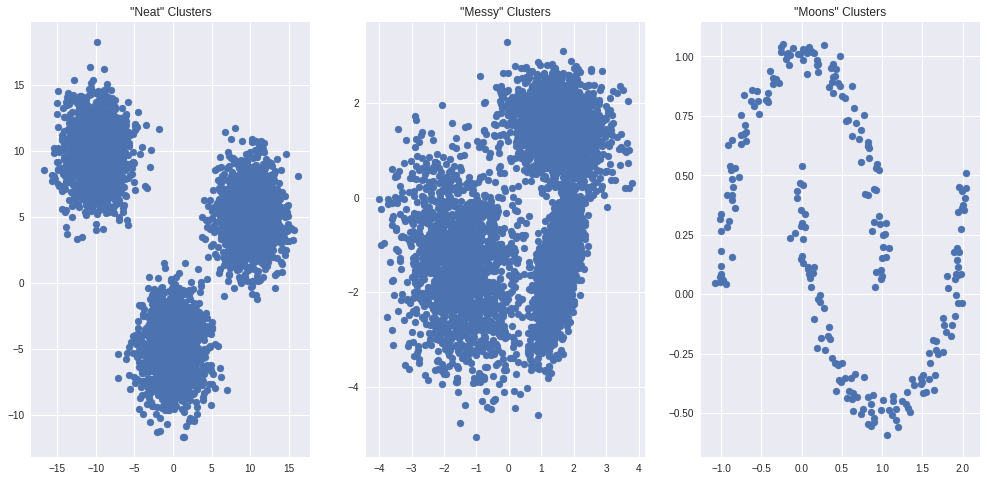

In [3]:
#Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(131, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(132, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])
plt.subplot(133, title='"Moons" Clusters')
plt.scatter(x_moons[:,0], x_moons[:,1])

## KMeans

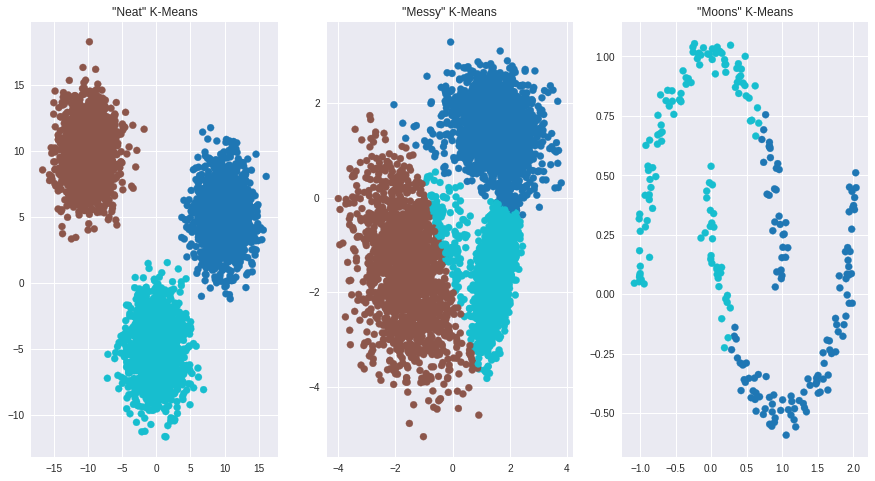

In [4]:
from sklearn.cluster import KMeans

#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)
km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)
km_moons = KMeans(n_clusters=2, random_state=2).fit_predict(x_moons)

plt.figure(figsize=(15,8))
plt.subplot(131, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap)
plt.subplot(132, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=km_messy, cmap=cmap)
plt.subplot(133, title='"Moons" K-Means')
plt.scatter(x_moons[:,0], x_moons[:,1], c=km_moons, cmap=cmap)

## Agglomerative Clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
#Predict K-Means cluster membership
ac_neat = AgglomerativeClustering(n_clusters=3).fit_predict(x_neat)
ac_messy = AgglomerativeClustering(n_clusters=3).fit_predict(x_messy)
ac_moons = AgglomerativeClustering(n_clusters=2).fit_predict(x_moons)

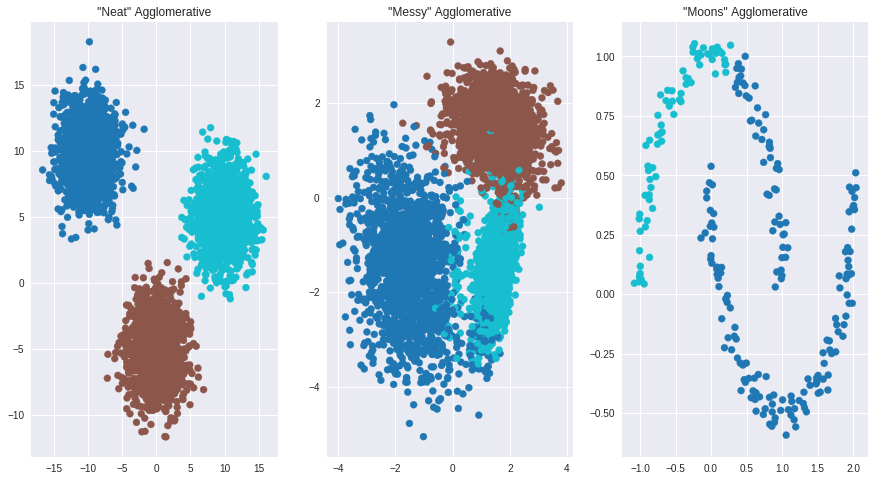

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(131, title='"Neat" Agglomerative')
plt.scatter(x_neat[:,0], x_neat[:,1], c=ac_neat, cmap=cmap)
plt.subplot(132, title='"Messy" Agglomerative')
plt.scatter(x_messy[:,0], x_messy[:,1], c=ac_messy, cmap=cmap)
plt.subplot(133, title='"Moons" Agglomerative')
plt.scatter(x_moons[:,0], x_moons[:,1], c=ac_moons, cmap=cmap)

## DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

In [61]:
#Predict K-Means cluster membership
dbs_neat = DBSCAN(eps=2, min_samples=20).fit_predict(x_neat)
dbs_messy = DBSCAN(eps=2, min_samples=160).fit_predict(x_messy)
dbs_moons = DBSCAN(eps=0.3, min_samples=20).fit_predict(x_moons)

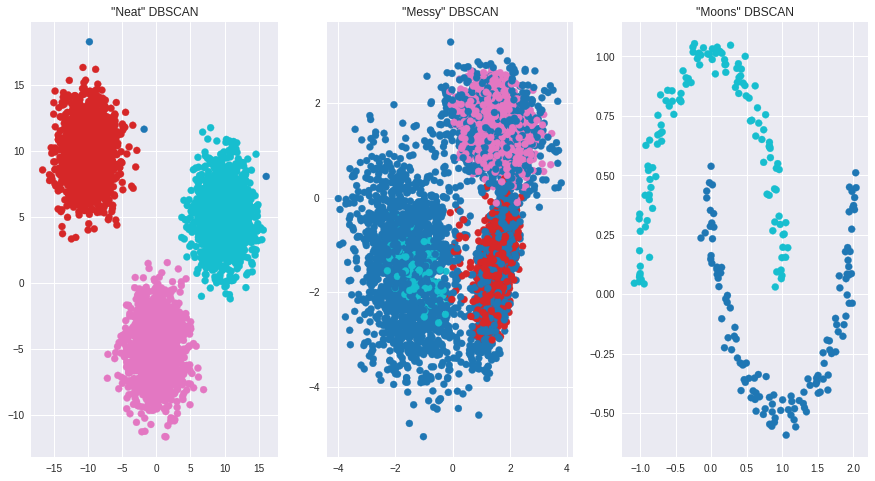

In [62]:
plt.figure(figsize=(15,8))
plt.subplot(131, title='"Neat" DBSCAN')
plt.scatter(x_neat[:,0], x_neat[:,1], c=dbs_neat, cmap=cmap)
plt.subplot(132, title='"Messy" DBSCAN')
plt.scatter(x_messy[:,0], x_messy[:,1], c=dbs_messy, cmap=cmap)
plt.subplot(133, title='"Moons" DBSCAN')
plt.scatter(x_moons[:,0], x_moons[:,1], c=dbs_moons, cmap=cmap)